In [2]:
import sys
sys.path.append("..")

In [29]:
import numpy as np
from prediction.prediction_set import PredictionSet
definition = 'CP07'
input_path = '../../data/data_labeled.h5'
cutoff_point = 90
prediction_interval = 30
prediction_set = PredictionSet(definition, input_path, cutoff_point, prediction_interval)
labels = np.ravel(prediction_set.get_labels_for_prediction())
data = prediction_set.cutoff_for_prediction()

In [30]:
wind_60 = data[:, 0, :]
wind_65 = data[:, 1, :]
temp_60_90 = data[:, 2, :]

In [66]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, init='pca', random_state=0).fit_transform(wind_65)

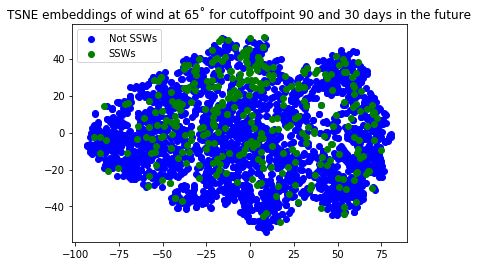

In [67]:
from matplotlib import pyplot as plt
not_ssws = plt.scatter(X_embedded[labels==0][:, 0], X_embedded[labels==0][:, 1], c='b')
ssws = plt.scatter(X_embedded[labels==1][:, 0], X_embedded[labels==1][:, 1], c='g')
plt.legend((not_ssws, ssws),
           ('Not SSWs', 'SSWs'),
           scatterpoints=1,
           loc='upper left')
plt.title("TSNE embeddings of wind at 65˚ for cutoffpoint {0} and {1} days in the future".format(cutoff_point, prediction_interval))
plt.show()